In [1]:
require(data.table)
require(ggplot2)
setwd("/local/home/sarahgw/WGS/SNPS/Myso/mafs")

Loading required package: data.table
Loading required package: ggplot2


In [2]:
Post_mylu=fread("Post_Myso_Mylufilt.mafs", header=TRUE)
Pre_mylu=fread("Pre_Myso_Mylufilt.mafs", header=TRUE)

Read 39195505 rows and 8 (of 8) columns from 1.817 GB file in 00:00:32
Read 44257834 rows and 8 (of 8) columns from 2.051 GB file in 00:00:36


In [3]:
colnames(Post_mylu)=c("Scaffold", "Position", "Major", "Minor", "Maf1_Post", "Maf2_Post", "Maf3_Post", "nInd_Post")
colnames(Pre_mylu)=c("Scaffold", "Position", "Major", "Minor", "Maf1_Pre", "Maf2_Pre", "Maf3_Pre", "nInd_Pre")

In [4]:
head(Post_mylu)

Scaffold,Position,Major,Minor,Maf1_Post,Maf2_Post,Maf3_Post,nInd_Post
GL429767,78,G,A,0.000000,0.000006,0.000000,1
GL429767,195,C,T,0.000000,0.000006,0.000000,2
GL429767,196,T,C,0.000000,0.000006,0.000000,2
GL429767,202,A,G,1.000008,0.999954,1.001002,2
GL429767,295,A,T,0.000000,0.000006,0.000000,2
GL429767,317,G,A,0.000000,0.000006,0.000000,5


In [18]:
All_mylu_myso=merge(Post_mylu, Pre_mylu, by=c("Scaffold", "Position", "Major", "Minor"))

In [6]:
head(All_mylu)

Scaffold,Position,Major,Minor,Maf1_Post,Maf2_Post,Maf3_Post,nInd_Post,Maf1_Pre,Maf2_Pre,Maf3_Pre,nInd_Pre
AAPE02055386,57060,T,C,0.000000,0.000006,0.000000,1,0.000000,0.000006,0.000000,3
AAPE02055386,114518,T,C,1.000008,0.999954,1.001002,1,1.000008,0.999954,1.001002,1
AAPE02055386,114530,A,C,1.000008,0.999954,1.001002,1,1.000008,0.999954,1.001002,1
AAPE02055386,114533,G,A,0.000000,0.000006,0.000000,1,0.000000,0.000006,0.000000,2
AAPE02055947,107428,C,T,0.118078,0.116287,0.065798,6,0.000000,0.000003,0.000000,7
AAPE02055947,107430,G,A,0.000000,0.000001,0.000000,6,0.000000,0.000003,0.000000,7


In [6]:
#comPvaluesChrNJNY50sigout=read.csv("~/WGS/SNPS/All_mylu/snps/NJNY50noout2_sigCompvaluesNe424_296.csv", row.names=1)

In [7]:
mafsNJNY50Sig=read.csv("~/WGS/SNPS/All_mylu/snps/njnyeu50SigMafsout.csv")

In [8]:
head(mafsNJNY50Sig)

X,Scaffold,Position,Major,Minor,Maf1_E.NJ,Maf2_E.NJ,Maf3_E.NJ,nInd_E.NJ,Maf1_U.NJ,⋯,Maf3_U.NY,nInd_U.NY,diff.NY,nInd.NY,NewScaf,NJ_Pval,NY_Pval,CombinedP,rank,BH
1,GL429767,16839644,T,A,0.137273,0.047404,0.145505,10,0.665153,⋯,0.943745,9,-0.705524,1,NW_005871048.1,8.399992e-05,4.969995e-04,7.511125e-07,81,8.330034e-07
2,GL429767,22649683,T,A,0.536439,0.536439,0.519259,14,0.063587,⋯,0.235426,12,0.603049,2,NW_005871048.1,6.589993e-04,4.999995e-06,6.764905e-08,32,3.290878e-07
3,GL429767,38456248,T,C,0.714101,0.714099,0.741579,13,0.098380,⋯,0.042049,11,0.533519,2,NW_005871048.1,2.899997e-05,1.383999e-03,7.236905e-07,80,8.227194e-07
4,GL429767,4550108,T,C,0.234004,0.234005,0.251118,14,0.783170,⋯,0.656050,13,-0.526435,2,NW_005871048.1,1.699998e-04,7.899992e-05,2.568587e-07,59,6.067556e-07
5,GL429767,46534125,C,T,0.140358,0.140358,0.159855,15,0.750253,⋯,0.567234,15,-0.574613,5,NW_005871048.1,6.699993e-05,9.999990e-07,1.636561e-09,10,1.028399e-07
6,GL429767,51542790,G,T,0.719369,0.719370,0.681925,15,0.188053,⋯,0.075654,13,0.654775,2,NW_005871048.1,1.017999e-03,3.999996e-06,8.273935e-08,36,3.702237e-07


In [19]:
All_mylu_mysosig=merge(All_mylu, mafsNJNY50Sig, by=c("Scaffold", "Position"))

In [21]:
All_mylu_mysosig$diff_myso=All_mylu_mysosig$Maf1_Post-All_mylu_mysosig$Maf1_Pre

In [10]:
#All_mylusig_4=All_mylusig[All_mylusig$nInd_Post>3 & All_mylusig$nInd_Pre>3,]

In [12]:
All_mylu_mysopos=All_mylusig[All_mylusig$diff_myso>0 & All_mylusig$diff.NY>0,]
All_mylu_mysoneg=All_mylusig[All_mylusig$diff_myso<0 & All_mylusig$diff.NY<0,]

In [66]:
All_mylu_mysomaj=All_mylu_mysosig[All_mylu_mysosig$Maf1_Post<0.5 & All_mylu_mysosig$diff.NY<0,]
All_mylu_mysomin=All_mylu_mysosig[All_mylu_mysosig$Maf1_Post>0.5 & All_mylu_mysosig$diff.NY>0,]

In [67]:
head(All_mylu_mysomin)

Scaffold,Position,Major.x,Minor.x,Maf1_Post,Maf2_Post,Maf3_Post,nInd_Post,Maf1_Pre,Maf2_Pre,⋯,NY_Pval,CombinedP,rank,BH,diff_myso,Allele,Freq.NJ,Freq.NY,Freq.SO,BPCum
GL429767,38456248,T,C,0.666710,0.399978,0.667001,3,0.459748,0.214584,⋯,1.383999e-03,7.236905e-07,80,8.227194e-07,0.206962,C,0.714101,0.533540,0.666710,3
GL429767,51542790,G,T,1.000005,0.452893,1.001002,3,1.000002,0.999787,⋯,3.999996e-06,8.273935e-08,36,3.702237e-07,0.000003,T,0.719369,0.672139,1.000005,5
GL429767,51542832,G,A,1.000005,0.452893,1.001002,3,1.000003,0.999998,⋯,2.539997e-04,5.865785e-09,15,1.542599e-07,0.000002,A,0.712276,0.729278,1.000005,6
GL429768,29962249,A,G,0.600992,0.305758,0.608913,4,0.798076,0.798074,⋯,5.241995e-03,1.051887e-07,38,3.907917e-07,-0.197084,G,0.659928,0.636289,0.600992,9
GL429773,7204887,C,T,1.000008,0.999954,1.001002,2,1.000005,0.999998,⋯,4.671095e-02,8.351578e-07,84,8.638554e-07,0.000003,T,0.812410,0.883925,1.000008,12
GL429783,665407,C,T,0.666715,0.399991,0.667001,3,0.841646,0.309023,⋯,3.521596e-02,6.395835e-07,75,7.712994e-07,-0.174931,T,0.801063,0.811486,0.666715,16


In [51]:
All_mylu_myso_close=rbind(All_mylu_mysomaj, All_mylu_mysomin)

In [42]:
All_mylu_mysosig$Allele=ifelse(All_mylu_mysosig$diff.NY<0, All_mylu_mysosig$Major.x, All_mylu_mysosig$Minor.x)
All_mylu_mysosig$Freq.NJ=ifelse(All_mylu_mysosig$diff.NJ<0, 1-All_mylu_mysosig$Maf1_E.NJ, All_mylu_mysosig$Maf1_E.NJ)
All_mylu_mysosig$Freq.NY=ifelse(All_mylu_mysosig$diff.NY<0, 1-All_mylu_mysosig$Maf1_E.NY, All_mylu_mysosig$Maf1_E.NY)
All_mylu_mysosig$Freq.SO=ifelse(All_mylu_mysosig$diff.NJ<0, 1-All_mylu_mysosig$Maf1_Post, All_mylu_mysosig$Maf1_Post)


In [43]:
head(All_mylu_mysosig)

Scaffold,Position,Major.x,Minor.x,Maf1_Post,Maf2_Post,Maf3_Post,nInd_Post,Maf1_Pre,Maf2_Pre,⋯,NY_Pval,CombinedP,rank,BH,diff_myso,Allele,Freq.NJ,Freq.NY,Freq.SO,BPCum
GL429767,4550108,T,C,1.000003,0.361570,1.001002,2,1.000002,0.999997,⋯,7.899992e-05,2.568587e-07,59,6.067556e-07,0.000001,T,0.765996,0.867151,-0.000003,1
GL429767,22649683,T,A,0.000000,0.000003,0.000000,3,0.000000,0.000004,⋯,4.999995e-06,6.764905e-08,32,3.290878e-07,0.000000,A,0.536439,0.860211,0.000000,2
GL429767,38456248,T,C,0.666710,0.399978,0.667001,3,0.459748,0.214584,⋯,1.383999e-03,7.236905e-07,80,8.227194e-07,0.206962,C,0.714101,0.533540,0.666710,3
GL429767,46534125,C,T,0.000000,0.000006,0.000000,2,0.000000,0.000003,⋯,9.999990e-07,1.636561e-09,10,1.028399e-07,0.000000,C,0.859642,1.000000,1.000000,4
GL429767,51542790,G,T,1.000005,0.452893,1.001002,3,1.000002,0.999787,⋯,3.999996e-06,8.273935e-08,36,3.702237e-07,0.000003,T,0.719369,0.672139,1.000005,5
GL429767,51542832,G,A,1.000005,0.452893,1.001002,3,1.000003,0.999998,⋯,2.539997e-04,5.865785e-09,15,1.542599e-07,0.000002,A,0.712276,0.729278,1.000005,6


In [75]:
All_mylu_mysosig$BPCum=as.numeric(rownames(All_mylu_mysosig))

In [15]:
NROW(All_mylupos)
NROW(All_myluneg)
NROW(All_mylumaj)
NROW(All_mylumin)

[1] 13

[1] 0

[1] 20

[1] 15

In [37]:
ggplot(All_mylu_mysosig, aes(x=BPCum, y=Freq.NJ)) +
    geom_point( aes(color=as.factor(Scaffold)), alpha=0.8, size=1.3, pch=1) +
    scale_color_manual(values = rep(c("lightgrey", "darkgrey"), 76 )) +
    geom_point(data=subset(allsnpshiscafsub, SNP==1), color="darkred", size=2) +    
    theme_bw() +
    xlab("Scaffold")+
    ylab("Change in Allele Frequency")+
    ylim(-.75, .75)+
    theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20)
    )

ERROR: Error in subset(allsnpshiscafsub, SNP == 1): object 'allsnpshiscafsub' not found


In [62]:
head(All_mylu_myso_close)

Scaffold,Position,Major.x,Minor.x,Maf1_Post,Maf2_Post,Maf3_Post,nInd_Post,Maf1_Pre,Maf2_Pre,⋯,NY_Pval,CombinedP,rank,BH,diff_myso,Allele,Freq.NJ,Freq.NY,Freq.SO,BPCum
GL429767,46534125,C,T,0,0.000006,0,2,0,0.000003,⋯,9.999990e-07,1.636561e-09,10,1.028399e-07,0,C,0.859642,1.000000,1,4
GL429768,9041952,A,G,0,0.000006,0,5,0,0.000002,⋯,9.999990e-07,8.732174e-07,85,8.741394e-07,0,A,0.660159,0.885159,1,8
GL429770,8292792,A,T,0,0.000006,0,5,0,0.000002,⋯,9.999990e-07,2.124122e-10,8,8.227194e-08,0,A,0.720687,0.956862,1,10
GL429781,7594948,A,T,0,0.000003,0,4,0,0.000003,⋯,9.999990e-07,3.284782e-07,62,6.376075e-07,0,A,0.827179,0.874468,1,15
GL429835,2966433,A,G,0,0.241019,0,3,0,0.039358,⋯,2.249998e-04,6.645927e-07,76,7.815834e-07,0,A,0.769367,0.912398,1,22
GL429835,2966452,T,G,0,0.000003,0,5,0,0.000004,⋯,4.599995e-05,7.881321e-07,83,8.535714e-07,0,T,0.865913,0.935883,1,23


In [80]:
NROW(unique(All_mylu_mysosig$Scaffold))

[1] 58

In [57]:
subset(All_mylu_mysosig, Position %in% All_mylu_myso_close$Position)

Scaffold,Position,Major.x,Minor.x,Maf1_Post,Maf2_Post,Maf3_Post,nInd_Post,Maf1_Pre,Maf2_Pre,⋯,NY_Pval,CombinedP,rank,BH,diff_myso,Allele,Freq.NJ,Freq.NY,Freq.SO,BPCum
GL429767,38456248,T,C,0.666710,0.399978,0.667001,3,0.459748,0.214584,⋯,1.383999e-03,7.236905e-07,80,8.227194e-07,0.206962,C,0.714101,0.533540,0.666710,3
GL429767,46534125,C,T,0.000000,0.000006,0.000000,2,0.000000,0.000003,⋯,9.999990e-07,1.636561e-09,10,1.028399e-07,0.000000,C,0.859642,1.000000,1.000000,4
GL429767,51542790,G,T,1.000005,0.452893,1.001002,3,1.000002,0.999787,⋯,3.999996e-06,8.273935e-08,36,3.702237e-07,0.000003,T,0.719369,0.672139,1.000005,5
GL429767,51542832,G,A,1.000005,0.452893,1.001002,3,1.000003,0.999998,⋯,2.539997e-04,5.865785e-09,15,1.542599e-07,0.000002,A,0.712276,0.729278,1.000005,6
GL429768,9041952,A,G,0.000000,0.000006,0.000000,5,0.000000,0.000002,⋯,9.999990e-07,8.732174e-07,85,8.741394e-07,0.000000,A,0.660159,0.885159,1.000000,8
GL429768,29962249,A,G,0.600992,0.305758,0.608913,4,0.798076,0.798074,⋯,5.241995e-03,1.051887e-07,38,3.907917e-07,-0.197084,G,0.659928,0.636289,0.600992,9
GL429770,8292792,A,T,0.000000,0.000006,0.000000,5,0.000000,0.000002,⋯,9.999990e-07,2.124122e-10,8,8.227194e-08,0.000000,A,0.720687,0.956862,1.000000,10
GL429773,7204887,C,T,1.000008,0.999954,1.001002,2,1.000005,0.999998,⋯,4.671095e-02,8.351578e-07,84,8.638554e-07,0.000003,T,0.812410,0.883925,1.000008,12
GL429781,7594948,A,T,0.000000,0.000003,0.000000,4,0.000000,0.000003,⋯,9.999990e-07,3.284782e-07,62,6.376075e-07,0.000000,A,0.827179,0.874468,1.000000,15
GL429783,665407,C,T,0.666715,0.399991,0.667001,3,0.841646,0.309023,⋯,3.521596e-02,6.395835e-07,75,7.712994e-07,-0.174931,T,0.801063,0.811486,0.666715,16


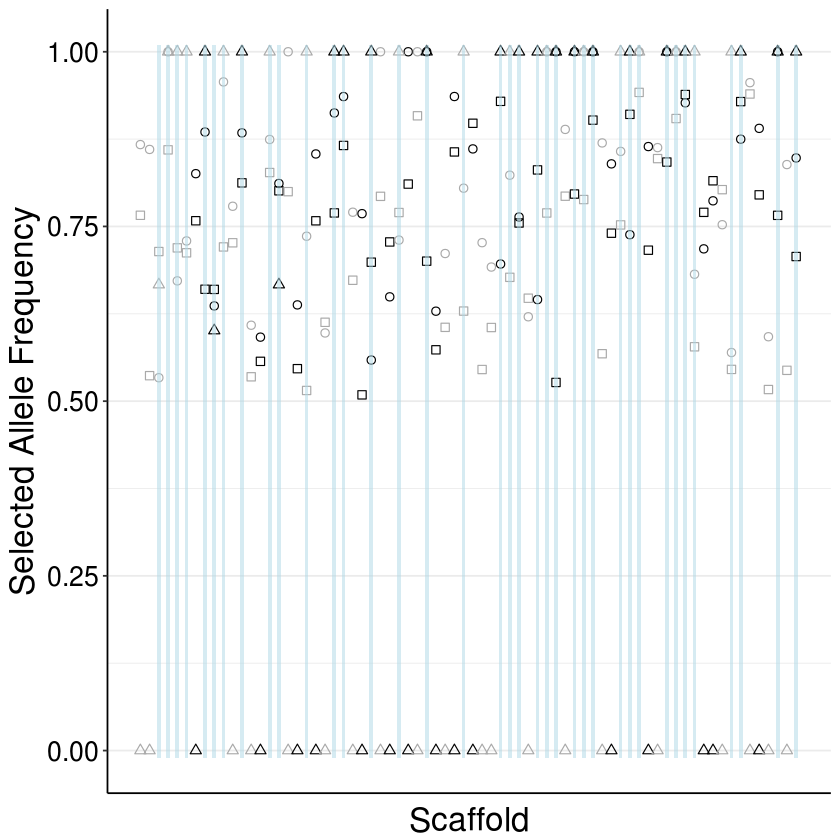

In [96]:
ggplot(data=All_mylu_mysosig )+
    geom_point( aes(x=BPCum, y=Freq.NJ, color=as.factor(Scaffold)), size=2, pch=0) +
    geom_point( aes(x=BPCum, y=Freq.NY, color=as.factor(Scaffold)), size=2, pch=1) +
    geom_point( aes(x=BPCum, y=Freq.SO, color=as.factor(Scaffold)), size=2, pch=2) +
    scale_color_manual(values = rep(c("darkgrey", "black"), 58 )) +
    geom_rect(data=subset(All_mylu_mysosig, Position %in% All_mylu_myso_close$Position), aes( xmin=BPCum-0.2, xmax=BPCum+0.2, ymin=-.01, ymax=1.01), fill="lightblue", alpha=0.5) +   
    theme_bw() +
    xlab("Scaffold")+
    ylab("Selected Allele Frequency")+
    ylim(-0.01, 1.01)+
    theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20)
    )

In [12]:
print(All_mylusig)

    Scaffold Position Major.x Minor.x Maf1_Post Maf2_Post Maf3_Post nInd_Post
 1: GL429767  4550108       T       C  1.000003  0.361570  1.001002         2
 2: GL429767 22649683       T       A  0.000000  0.000003  0.000000         3
 3: GL429767 38456248       T       C  0.666710  0.399978  0.667001         3
 4: GL429767 46534125       C       T  0.000000  0.000006  0.000000         2
 5: GL429767 51542790       G       T  1.000005  0.452893  1.001002         3
 6: GL429767 51542832       G       A  1.000005  0.452893  1.001002         3
 7: GL429768  3921142       G       C  1.000008  0.999954  1.001002         1
 8: GL429768  9041952       A       G  0.000000  0.000006  0.000000         5
 9: GL429768 29962249       A       G  0.600992  0.305758  0.608913         4
10: GL429770  8292792       A       T  0.000000  0.000006  0.000000         5
11: GL429770  8507307       A       C  0.000000  0.000005  0.000000         3
12: GL429773  7204887       C       T  1.000008  0.999954  1.001

Can you make a plot that shows allele frequencies (and which allele it is) for mylu pre post and myso pre post? 

To do:
calculate the change in allele freq. 
Remove ones that only have coverage in less than 3? individuals
Are the post ones the same as the mylu post? need to see if mylu are changing to be similar to them or vice versa. 
Also, might need to redo calculations with different major/minor???
Look at snps called just for myso...what is happening there are there any that change a lot and have a lot of individuals? 





## Look at changes in Myso-specific SNPs

In [97]:
Post_myso=fread("Post_Myso_filt.mafs", header=TRUE)
Pre_myso=fread("Pre_Myso_filt.mafs", header=TRUE)

In [98]:
colnames(Post_myso)=c("Scaffold", "Position", "Major", "Minor", "Maf1_Post", "Maf2_Post", "Maf3_Post", "nInd_Post")
colnames(Pre_myso)=c("Scaffold", "Position", "Major", "Minor", "Maf1_Pre", "Maf2_Pre", "Maf3_Pre", "nInd_Pre")

In [99]:
All_myso=merge(Post_myso, Pre_myso, by=c("Scaffold", "Position", "Major", "Minor"))

In [17]:
head(All_myso)

Scaffold,Position,Major,Minor,Maf1_Post,Maf2_Post,Maf3_Post,nInd_Post,Maf1_Pre,Maf2_Pre,Maf3_Pre,nInd_Pre
AAPE02057026,7832,G,A,0.109323,0.035824,0.045603,8,0.252346,0.252352,0.186005,13
AAPE02057026,7844,C,T,0.229875,0.089944,0.234764,8,0.263336,0.263341,0.193516,13
AAPE02057026,7862,A,C,0.000000,0.000005,0.000000,7,0.110603,0.109144,0.064044,13
AAPE02057026,7956,G,A,0.166682,0.057728,0.194511,6,0.124301,0.041883,0.069621,11
AAPE02057026,7996,A,T,0.000000,0.000004,0.000000,6,0.333542,0.333547,0.297747,11
AAPE02057026,27994,T,C,0.133629,0.048498,0.099198,6,0.184148,0.184148,0.129396,11


In [100]:
All_myso$diff_myso=abs(All_myso$Maf2_Post-All_myso$Maf2_Pre)

In [102]:
All_Myso_high=All_myso[All_myso$diff>0.4,]

In [103]:
scaffoldnames=read.table("/local/home/sarahgw/references/scaffold_names")
key=scaffoldnames[3:4]
colnames(key)=c("NewScaf", "Scaffold")
key$Scaffold=gsub('\\.1', "", key$Scaffold)
All_Myso_high=merge(key, All_Myso_high, by="Scaffold")

In [104]:
write.csv(All_Myso_high, file="Myso_SNPs_high.csv")